In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix

In [19]:
# Load preprocessed data
tiktok_df = pd.read_csv("../data/modifiedTiktok.csv")
# Downsample the dataset (keep 50% of the rows)
#tiktok_df = tiktok_df.sample(frac=0.5, random_state=42) tested this out to reduce load times

# Convert video_like_count into binary classes (high vs low likes)
median_likes = tiktok_df['video_like_count'].median()  # Calculate the median
tiktok_df['like_category'] = (tiktok_df['video_like_count'] > median_likes).astype(int)  # 1 for above-median likes, 0 for below-median

X = tiktok_df[['video_duration_sec', 'video_view_count', 'video_share_count', 'video_comment_count']]
y = tiktok_df['like_category']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression with optimizations
lr_model = LogisticRegression()  # Simplified solver and reduced iterations
lr_model.fit(X_train, y_train)

# Predict with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2865
           1       0.99      0.92      0.96      2861

    accuracy                           0.96      5726
   macro avg       0.96      0.96      0.96      5726
weighted avg       0.96      0.96      0.96      5726



In [37]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


# Evaluate K-NN
print("K-NN Metrics:")
print(classification_report(y_test, y_pred_knn))

K-NN Metrics:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2865
           1       0.98      0.96      0.97      2861

    accuracy                           0.97      5726
   macro avg       0.97      0.97      0.97      5726
weighted avg       0.97      0.97      0.97      5726



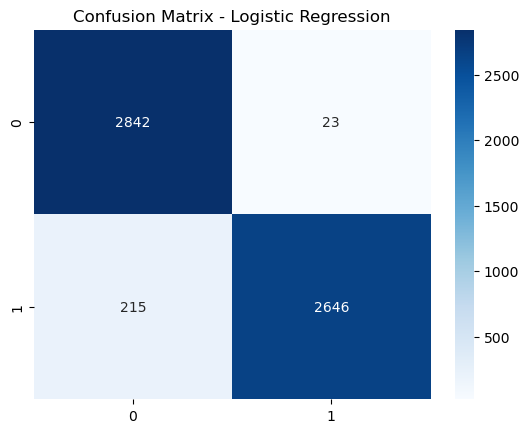

In [23]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

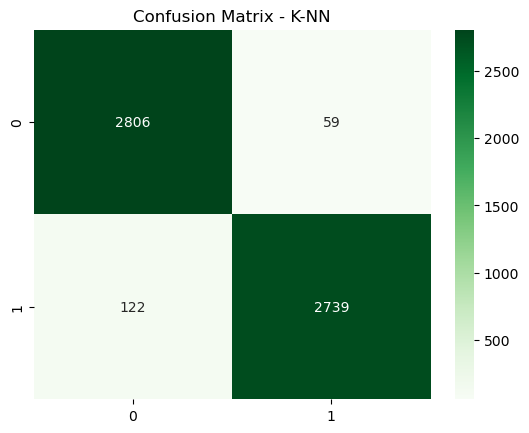

In [39]:
# Confusion Matrix for K-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - K-NN")
plt.show()

In [43]:
# For classification
metrics_classification = {
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True),
    "K-NN": classification_report(y_test, y_pred_knn, output_dict=True),
}
with open("../results/metrics_classification.json", "w") as f:
    json.dump(metrics_classification, f)